In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 


In [2]:
from qam import QAM

modem = QAM(M=16)
mapping_dictionary = modem.get_map()
demapping_dict = modem.get_demap()

In [3]:
def awgn_channel(symbols, snr=99):
    # Additive White Gaussian noise with 0dB variance 
    n = 1/np.sqrt(2) * (np.random.randn(len(symbols)) + 1j * np.random.randn(len(symbols)))
    y = symbols + 10 ** (-snr / 20) * n 
    return y 



In [4]:
# bitstream = np.array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1,])
bitstream = np.array(np.random.rand(100) > 0.5, np.int32)
M = 16
k = int(np.log2(M))

# number of symbols
N = 10**5
# constellation size 
M = 16
# bits per symbol
EbN0 = np.arange(0, 13)
SNR = EbN0 + 10 * np.log10(k) 
BERs = []

for snr in SNR :
    # initialize modulator-demodulatore scheme
    modem = QAM(M=M)

    # generate bitstream (coded) 
    total_messages = np.int32(np.random.rand(N * k) > 0.5)

    # modulation
    symbols = modem.modulate(total_messages)

    # AWGN channel without fading 

    y = awgn_channel(symbols, snr) 

    # demodulation 
    m_hat = modem.demodulate(y)

    # compute BER 
    BERs.append(np.sum(total_messages != m_hat) / (N*k))



In [5]:
BER_theory = [(1/k) * 3 / 2 * np.math.erfc(np.sqrt(k * 0.1 * 10 ** (eb/10))) for eb in EbN0]

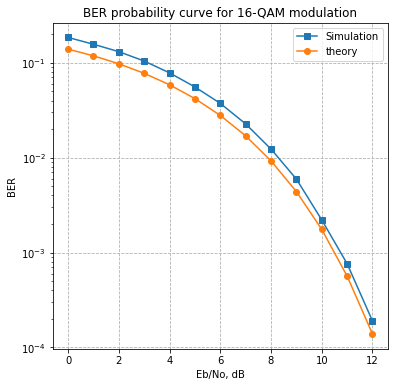

In [6]:

plt.figure(figsize=(6, 6))
plt.semilogy(BERs, 's-', label="Simulation")
plt.semilogy(BER_theory, 'o-', label="theory")
plt.legend()
plt.title(f"BER probability curve for {M}-QAM modulation")
plt.xlabel("Eb/No, dB")
plt.ylabel("BER") 
plt.grid(True, linestyle='--')
plt.show()

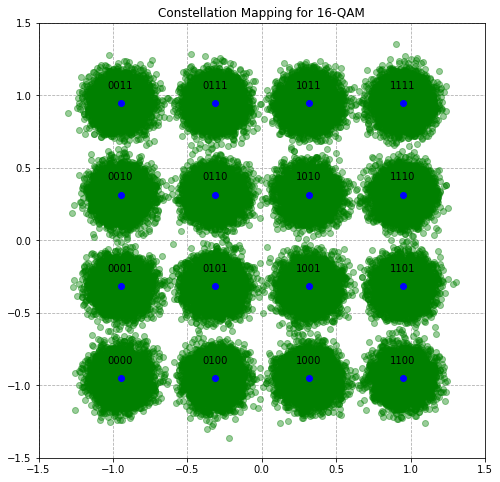

In [7]:
# plot of symbols
modem.plot_constellation_points()
plt.plot(np.real(y / modem.avg_power), np.imag(y / modem.avg_power), 'go', alpha=0.4, zorder=2)
plt.show()

In [3]:
mapping = modem.get_map()
avgpower = [abs(i)**2 for i in mapping.values()]
avgpower = np.sqrt(np.average(avgpower))

In [4]:
avgpower == np.sqrt(10)

True

In [4]:
modem.avg_power == np.sqrt(10)

True